### A code which creates the Wigner interactive function in 2D and 3D with different squeezing parameters.

In [1]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

First testing out the interactive plots

In [2]:
def model(x,A):
    return np.sin(x)*A

def interactive_plot(A):
    x = np.linspace(0,10,100)
    y = model(x,A)
    plt.plot(x,y)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{A}sin(x)')
    return

interact(interactive_plot, A=widgets.FloatSlider(value=1, min=-10, max=10, step=0.1))


interactive(children=(FloatSlider(value=1.0, description='A', max=10.0, min=-10.0), Output()), _dom_classes=('…

<function __main__.interactive_plot(A)>

Defining the Wigner function

In [3]:
# Create functions for calculating the Wigner function of a general Gaussian state.

def WignerFunction(x,p,x_displacement,y_displacement,sigma,n=1): 

    r_vec = np.array([x, p])
    
    x_mean = np.mean(x) 
    p_mean = np.mean(p) 

    r_vec_mean = np.array([x_displacement,y_displacement])
    
    delta = r_vec - r_vec_mean

    

    Wigner = ( 1 / ( (2*np.pi)**n * np.sqrt(np.linalg.det(sigma)) ) ) * np.exp( -0.5 * (delta).T @ np.linalg.inv(sigma) @ (delta) )
    return Wigner

In [4]:
def Wigner_Plot(sigma,x_displacement,y_displacement):
    x = np.linspace(-5,5,200)
    p = np.linspace(-5,5,200)

    X,P = np.meshgrid(x,p)

    W = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            W[i, j] = WignerFunction(X[i, j], P[i, j],x_displacement,y_displacement,sigma)

    return W, X, P


Creating a function which changes sigma depending on the squeezing factor

In [5]:
sigma_vacuum = 0.5*np.eye(2)
x_vacuum,p_vacuum = 0,0

r = 1

wigner_sqz_x = 0.5*np.array([
    [np.exp(-2*r),0],
    [0,np.exp(2*r)]
])

wigner_sqz_p = 0.5*np.array([
    [np.exp(2*r),0],
    [0,np.exp(-2*r)]
])

def sigma_func(r):
    sigma_sqz = 0.5*np.array([ [np.exp(2*r),0], [0,np.exp(-2*r)]])
    
    return sigma_sqz

def sigma_func_theta(r, theta):
    S_theta = np.array ([[np.cos(theta), np.sin(theta)],
                         [np.sin(theta), -np.cos(theta)]])
    sigma_sqz_theta = 0.5 * np.cosh(2*r)*np.eye(2) - 0.5 * np.sinh(2*r)*S_theta
    
    return sigma_sqz_theta

#wigner_vacuum, X, P  = Wigner_Plot(sigma_vacuum,x_vacuum,p_vacuum)
#wigner_sqz_x, X, P = Wigner_Plot(wigner_sqz_x,0,0)
wigner_sqz_p, X, P = Wigner_Plot(sigma_func(0.1),0,0)


In [6]:
def interactive_Wigner_Plot(r, x0, p0, theta):
    
    W = Wigner_Plot(sigma_func_theta(r, theta),x0,p0)

    plt.figure(figsize=(8,6))
    plt.contourf(X, P, W[0], levels=50, cmap='magma')
    plt.colorbar(label='Wigner function')
    plt.xlabel('x')
    plt.ylabel('p')
    plt.title('2D Wigner function plot')
    plt.show()
    return

In [7]:
interact(interactive_Wigner_Plot, 
         r=widgets.FloatSlider(value=0, min=-3, max=3, step=0.1),
         x0=widgets.FloatSlider(value=0.0, min=-4.0, max=4.0, step=0.1, description='x'),
         p0=widgets.FloatSlider(value=0.0, min=-4.0, max=4.0, step=0.1, description='p'),
         theta=widgets.FloatSlider(value=0.0, min=-np.pi, max=np.pi, step=0.1, description='theta'))

interactive(children=(FloatSlider(value=0.0, description='r', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

<function __main__.interactive_Wigner_Plot(r, x0, p0, theta)>

In [8]:
def interactive_Wigner_Plot_3D(r, x0, p0, theta):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    W,_,_ = Wigner_Plot(sigma_func_theta(r, theta), x0, p0)

    ax.plot_surface(X, P, W, cmap='magma', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.set_zlabel('W(x, p)')
    ax.set_title('3D Wigner Function')

    plt.tight_layout()
    plt.show()

    return

interact(interactive_Wigner_Plot_3D, 
         r=widgets.FloatSlider(value=0, min=-1, max=1, step=0.1),
         x0=widgets.FloatSlider(value=0.0, min=-4.0, max=4.0, step=0.1, description='x₀'),
         p0=widgets.FloatSlider(value=0.0, min=-4.0, max=4.0, step=0.1, description='p₀'),
         theta=widgets.FloatSlider(value=0.0, min=-2*np.pi, max=2*np.pi, step=0.1, description='theta'))

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

<function __main__.interactive_Wigner_Plot_3D(r, x0, p0, theta)>

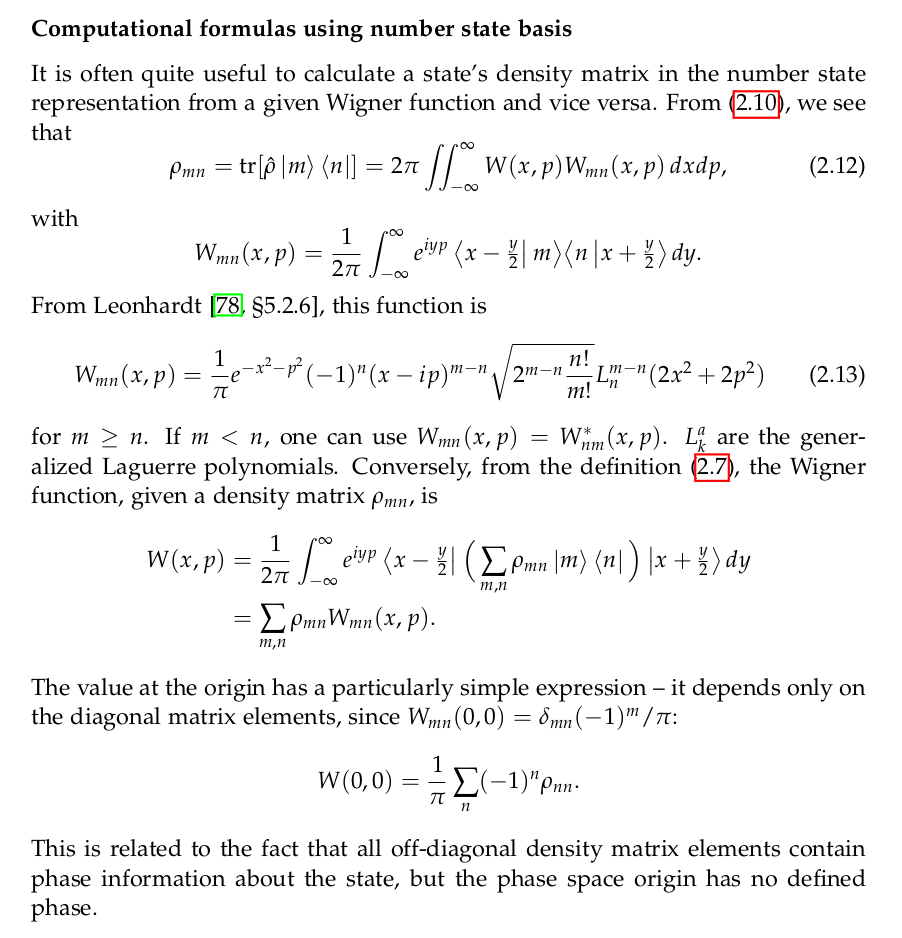

In [9]:
from scipy.special import genlaguerre, factorial
import scipy.integrate as integrate

In [10]:
W = Wigner_Plot(sigma_func_theta(0.1, 0), 0, 0)

In [11]:
def W_mn_func(m,n,x,p):

    L_n = genlaguerre(n, m - n)(2*x**2 + 2*p**2)
    W_mn = 1/np.pi * np.exp(-0.5 * (x**2 + p**2)) * (-1)**n *(x - 1j * p)**(m-n) * np.sqrt(2**(m-n)*factorial(n)/factorial(m)) * L_n
    return W_mn

d = W_mn_func(6, 4, 2, 2)

In [16]:
dx = X[0,1] - X[0,0]
dp = P[1,0] - P[0,0]
"""
def integrand(m,n,x,p, r=0, theta=0):
    return Wigner_Plot(sigma_func_theta(r, theta), x, p)[0] * W_mn_func(m, n, x, p)

def density_matrix_element(m, n, r=0, theta=0):
    return 2 * np.pi * integrand(m, n, 0, 0, r, theta) * dx * dp"""

def density_matrix_element_fixed(m, n, r=0, theta=0):
    # W_arr, X_arr, P_arr returned by your Wigner_Plot function
    W_arr, X_arr, P_arr = Wigner_Plot(sigma_func_theta(r, theta), X, P)[:3]
    integrand = W_arr * W_mn_func(m, n, X_arr, P_arr)
    return 2 * np.pi * np.sum(integrand) * dx * dp


In [17]:
def compute_rho_mn(m, n, W, x, p, dx, dp):
    W_mn = W_mn_func(m, n, x, p)
    W = W_mn_func(m,n,x,p)
    integrand = W * W_mn
    # Trapezoidal rule integration (2D)
    integral = np.trapz(np.trapz(integrand, dx=dp, axis=1), dx=dx)
    return 2 * np.pi * integral

In [18]:
m = np.linspace(0, 10, 11)
n = np.linspace(0, 10, 11)

W_val = []

for i in range(len(m)):
    for j in range(len(n)):

        if i > j:
            rho_mn = density_matrix_element_fixed(m[i], n[j])
            W_mn = W_mn_func(m[i], n[j], 0, 0)

            W_val.append(rho_mn * W_mn)

W = np.sum(W_val)


ValueError: operands could not be broadcast together with shapes (2,) (2,200,200) 